In [1]:
from networkx import algorithms
from networkx.algorithms import bipartite


In [2]:
import networkx as nx
import pylab as pl

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cm

In [4]:
import numpy as np
import osmnx as ox
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# five borrows

## manhattan

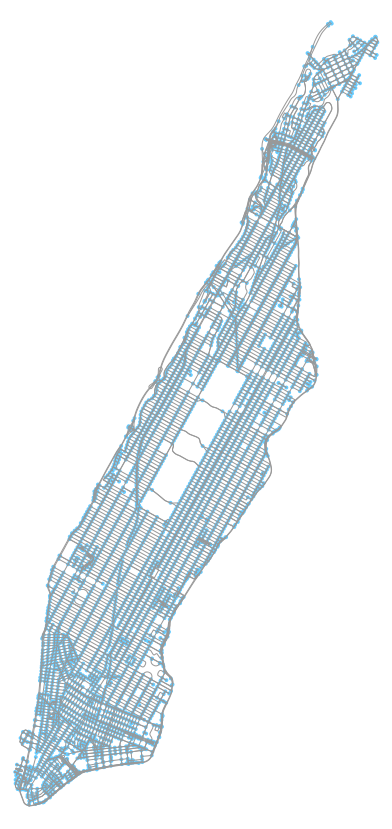

(<Figure size 661.231x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a229dc7b8>)

In [5]:
mnyc = ox.graph_from_place('Manhattan, NY, USA', network_type='drive')
ox.plot_graph(mnyc, fig_height=15)

In [6]:
mNYC_projected = ox.project_graph(mnyc)
# save street network as ESRI shapefile


In [18]:
mNYC_projected
ox.save_graph_shapefile(mNYC_projected, filename='Manhattan_network_shape', folder='.')

//anaconda/envs/earth-analytics-python/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [19]:
import geopandas as gpd

(582486.5053596001, 592199.238846268, 4505070.367031138, 4526545.506746575)

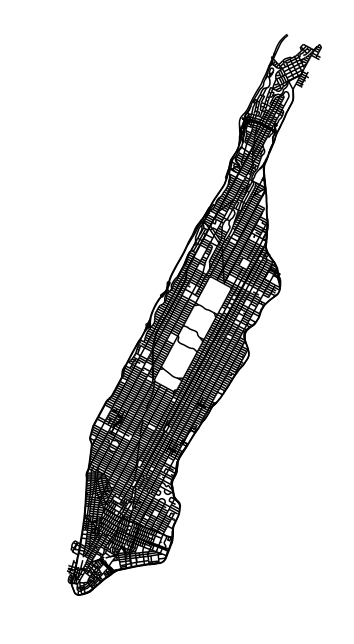

In [23]:
ax = pl.figure(figsize=(5,15)).add_subplot(111)
gpd.GeoDataFrame.from_file("Manhattan_network_shape/edges/edges.shp").plot(color='k', ax=ax)
ax.axis('off')

In [10]:
edge_centrality_nyc = nx.closeness_centrality(nx.line_graph(mnyc))

In [11]:
ev = [edge_centrality_nyc[edge + (0,)] for edge in mnyc.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
ec = [cmap.to_rgba(cl) for cl in ev]

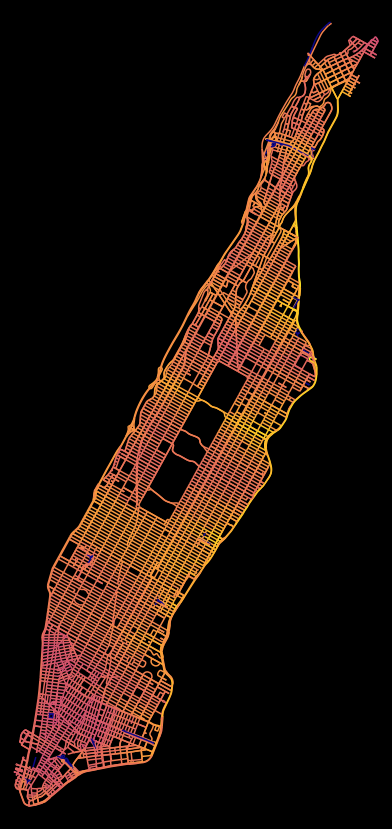

In [12]:
# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(mnyc, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1,
                        fig_height=15)


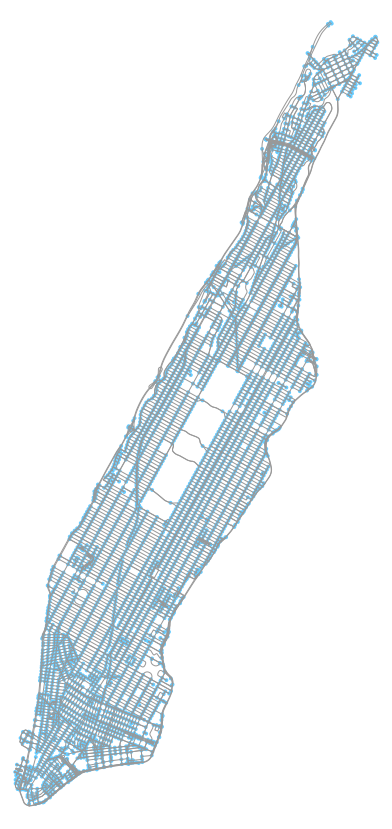

(<Figure size 661.231x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a6c9668>)

In [13]:
ox.plot_graph(mnyc, fig_height=15)

## Brooklyn

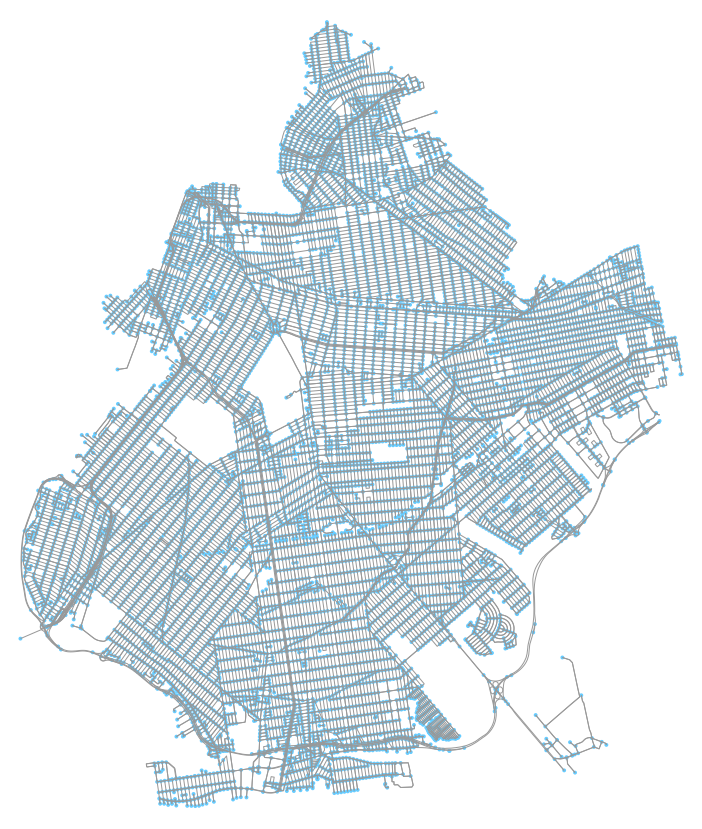

(<Figure size 1200.98x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1182e6eb8>)

In [14]:
place = {'county' : 'Kings',
         'state' : 'New York',
         'country' : 'USA'}
bknyc = ox.graph_from_place(place, network_type='drive')
ox.plot_graph(bknyc, fig_height=15)

## Bronx

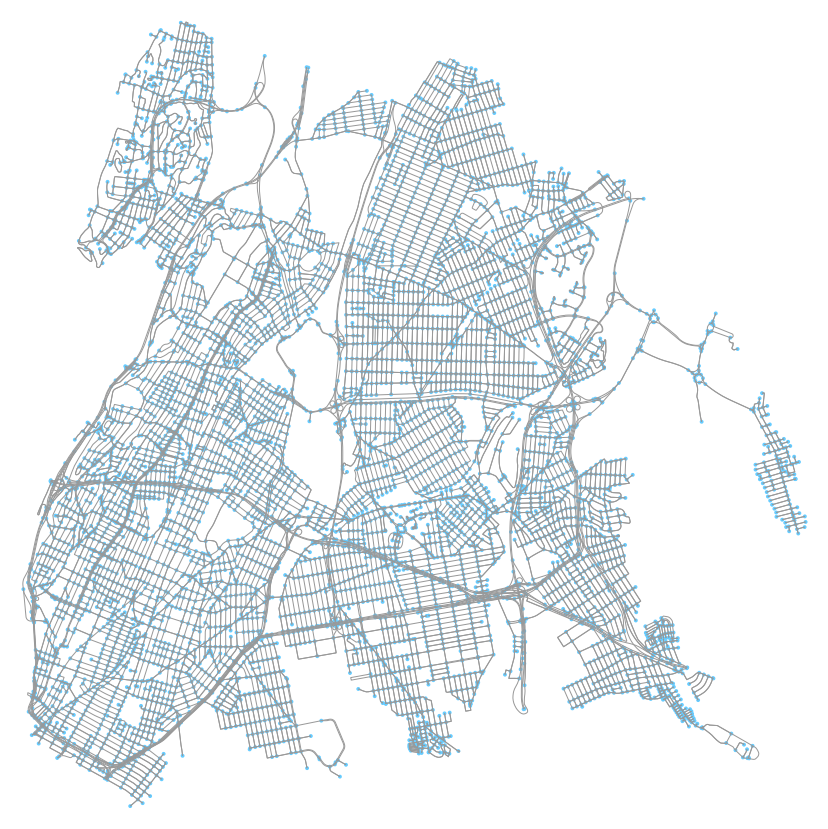

(<Figure size 1425.53x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2b130940>)

In [15]:
place = {'county' : 'Bronx',
         'state' : 'New York',
         'country' : 'USA'}
bxnyc = ox.graph_from_place(place, network_type='drive')
ox.plot_graph(bxnyc, fig_height=15)

## Queens

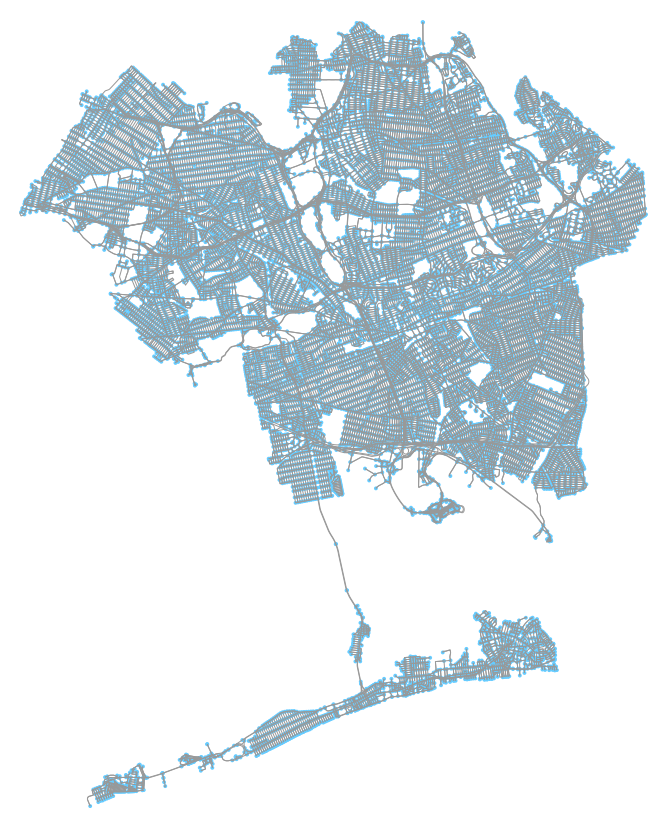

(<Figure size 1137.57x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c38dda0>)

In [16]:
place = {'county' : 'Queens',
         'state' : 'New York',
         'country' : 'USA'}
qnyc = ox.graph_from_place(place, network_type='drive')
ox.plot_graph(qnyc, fig_height=15)

## Staten Island

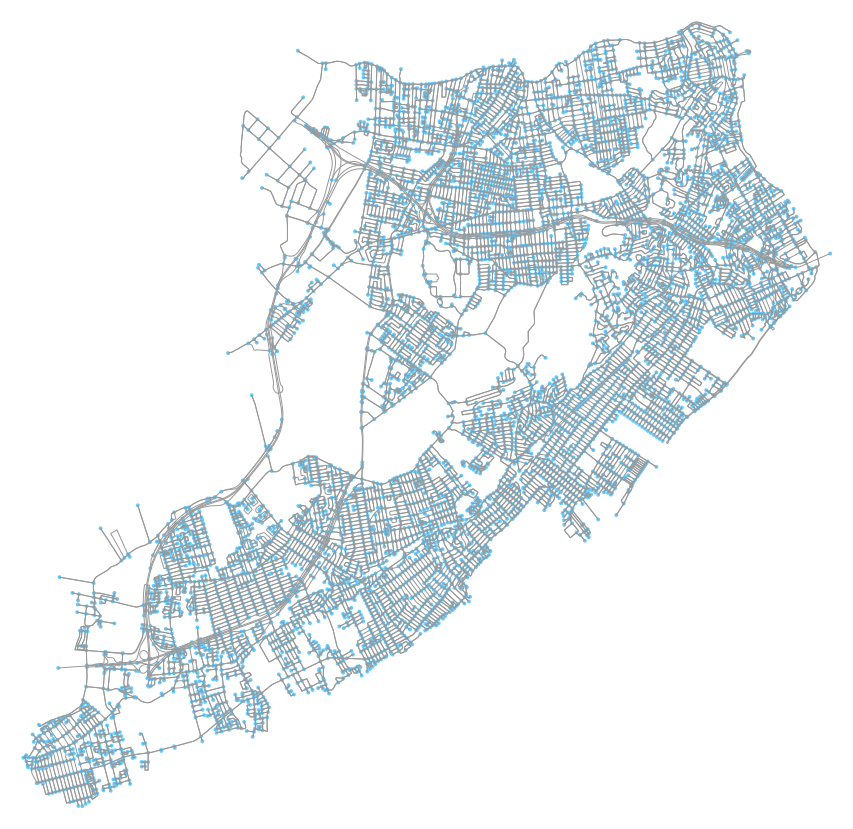

(<Figure size 1463.17x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a351a5c50>)

In [17]:
place = {'county' : 'Richmond',
         'state' : 'New York',
         'country' : 'USA'}
sinyc = ox.graph_from_place(place, network_type='drive')
ox.plot_graph(sinyc, fig_height=15)

## boroughs stats

In [18]:
manstats = ox.basic_stats(mnyc)
manstats

{'n': 4473,
 'm': 9730,
 'k_avg': 4.350547730829421,
 'intersection_count': 4370,
 'streets_per_node_avg': 3.576346970713168,
 'streets_per_node_counts': {0: 0,
  1: 103,
  2: 23,
  3: 1629,
  4: 2641,
  5: 66,
  6: 10,
  7: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.023027051196065282,
  2: 0.005141962888441762,
  3: 0.3641851106639839,
  4: 0.5904314777554214,
  5: 0.014755197853789403,
  6: 0.0022356360384529397,
  7: 0.000223563603845294},
 'edge_length_total': 1148179.793000001,
 'edge_length_avg': 118.00408972250781,
 'street_length_total': 964076.9030000002,
 'street_length_avg': 120.7057597345687,
 'street_segments_count': 7987,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0166155866239908,
 'self_loop_proportion': 0.0010277492291880781,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [20]:
bkstats = ox.basic_stats(bknyc)
bxstats = ox.basic_stats(bxnyc)
qstats = ox.basic_stats(qnyc)
sistats = ox.basic_stats(sinyc)

In [21]:
bkstats

{'n': 12256,
 'm': 30812,
 'k_avg': 5.028067885117493,
 'intersection_count': 11708,
 'streets_per_node_avg': 3.5265992167101827,
 'streets_per_node_counts': {0: 0,
  1: 548,
  2: 27,
  3: 4267,
  4: 7268,
  5: 129,
  6: 17},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.044712793733681463,
  2: 0.0022030026109660576,
  3: 0.34815600522193213,
  4: 0.5930156657963447,
  5: 0.010525456919060053,
  6: 0.0013870757180156658},
 'edge_length_total': 3660188.8229999864,
 'edge_length_avg': 118.79101723354493,
 'street_length_total': 2723376.52899999,
 'street_length_avg': 126.26931236090458,
 'street_segments_count': 21568,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0102100875942923,
 'self_loop_proportion': 6.490977541217708e-05,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [23]:
from sklearn import preprocessing
import scipy
from scipy.spatial import distance_matrix

In [24]:
borofeatures = np.zeros((5,12))
for j,city in enumerate([manstats, bkstats, bxstats, qstats, sistats]):
    for i,k in enumerate(['n', 'm', 'k_avg','intersection_count',
        'streets_per_node_avg','edge_length_total','street_length_total',
        'edge_length_avg','street_length_avg','street_segments_count',
        'circuity_avg','self_loop_proportion']):
        
        borofeatures[j][i] = city[k]

borofeatures = np.array(borofeatures)
borofeatures= preprocessing.scale(borofeatures)

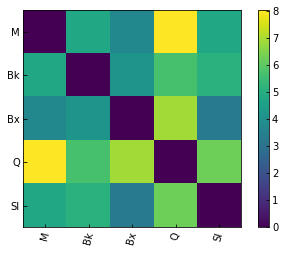

In [25]:
boroughs = ["M", "Bk", "Bx", "Q", "SI"]
ax = pl.figure().add_subplot(111)
dist = distance_matrix(borofeatures, borofeatures, p=2)
cax = ax.imshow(dist)
ax.set_xticks(range(len(boroughs)))
ax.set_yticks(range(len(boroughs)))
ax.set_xticklabels(boroughs, rotation=75)
ax.set_yticklabels(boroughs, rotation=0)
pl.colorbar(cax);

In [26]:
print("the most unlike boroughs", np.array(boroughs)[np.argsort(dist.mean(axis=0))[::-1]])

the most unlike boroughs ['Q' 'M' 'Bk' 'SI' 'Bx']


# world cities

## Santa Barbara, CA

In [29]:
# I will host the cities in this dictionary
citynets = {}

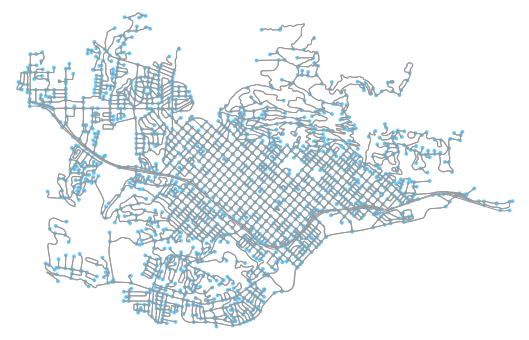

(<Figure size 827.307x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a3a2d86a0>)

In [30]:
sb = ox.graph_from_place('Santa Barbara, California', network_type='drive')
ox.plot_graph(sb)


In [31]:
sbstats = ox.basic_stats(sb)
sbstats

{'n': 2128,
 'm': 5640,
 'k_avg': 5.3007518796992485,
 'intersection_count': 1730,
 'streets_per_node_avg': 2.854793233082707,
 'streets_per_node_counts': {0: 0, 1: 398, 2: 9, 3: 1227, 4: 492, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.18703007518796994,
  2: 0.0042293233082706765,
  3: 0.5765977443609023,
  4: 0.231203007518797,
  5: 0.0009398496240601503},
 'edge_length_total': 845485.8359999995,
 'edge_length_avg': 149.90883617021268,
 'street_length_total': 462269.8499999998,
 'street_length_avg': 153.27249668435007,
 'street_segments_count': 3016,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0962211610330783,
 'self_loop_proportion': 0.0070921985815602835,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [32]:
citynets["Santa Barbara, California"] = (sb, sbstats)

In [33]:
edge_centrality = nx.closeness_centrality(nx.line_graph(sb))

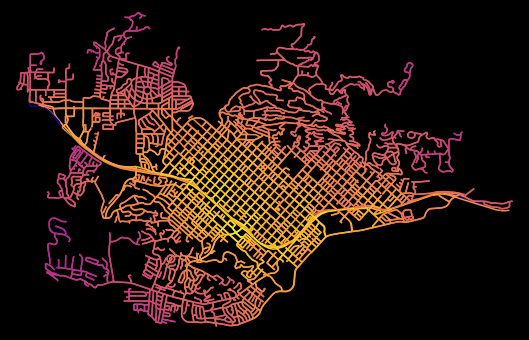

In [34]:
ev = [edge_centrality[edge + (0,)] for edge in sb.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(sb, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)


## genova, Italy

In [35]:
genova = ox.graph_from_place('Genova, Italy', network_type='drive')

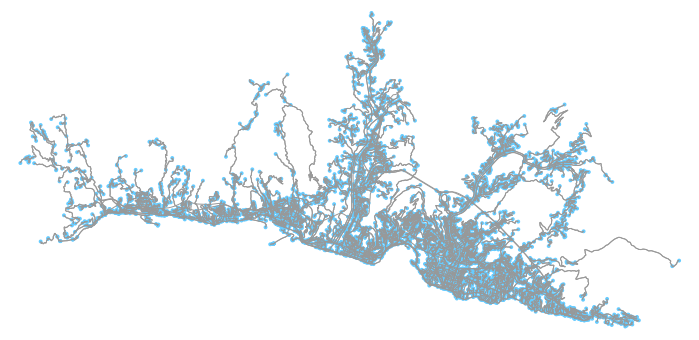

(<Figure size 1080x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c176160>)

In [36]:
ox.plot_graph(genova, fig_width=15)


In [37]:
gstats = ox.basic_stats(genova)
gstats 

{'n': 8930,
 'm': 17995,
 'k_avg': 4.03023516237402,
 'intersection_count': 6209,
 'streets_per_node_avg': 2.439417693169093,
 'streets_per_node_counts': {0: 0,
  1: 2721,
  2: 166,
  3: 5471,
  4: 545,
  5: 24,
  6: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3047032474804031,
  2: 0.01858902575587906,
  3: 0.6126539753639417,
  4: 0.06103023516237402,
  5: 0.0026875699888017916,
  6: 0.00033594624860022396},
 'edge_length_total': 2282689.1730000186,
 'edge_length_avg': 126.8513016393453,
 'street_length_total': 1335098.9079999933,
 'street_length_avg': 122.72257633973649,
 'street_segments_count': 10879,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.232208445284319,
 'self_loop_proportion': 0.0015559877743817727,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [38]:
citynets["Genova, Italy"] = (genova, gstats)

In [39]:
edge_centrality_genova = nx.closeness_centrality(nx.line_graph(genova))


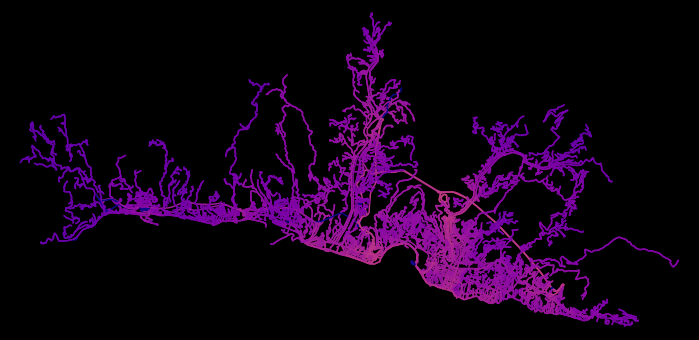

In [40]:
evg = [edge_centrality_genova[edge + (0,)] for edge in genova.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(evg)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
ec = [cmap.to_rgba(cl) for cl in evg]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(genova, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)


## more cities

In [41]:
morecities = []
for city in ["Chicago, IL", "Paris, France", "Sydney, Australia", "New York, NY"]:
    print(city)
    morecities.append(ox.graph_from_place(city, network_type='drive'))
    

Chicago, IL
Paris, France
Sydney, Australia
New York, NY


In [42]:
for i,city in enumerate(["Chicago, IL", "Paris, France", "Sydney, Australia", "New York, NY"]):
    citynets[city] = (morecities[i], ox.basic_stats(morecities[i]))

In [49]:
citynets["New York, NY"] = (morecities[-1], ox.basic_stats(morecities[-1]))


Santa Barbara, California


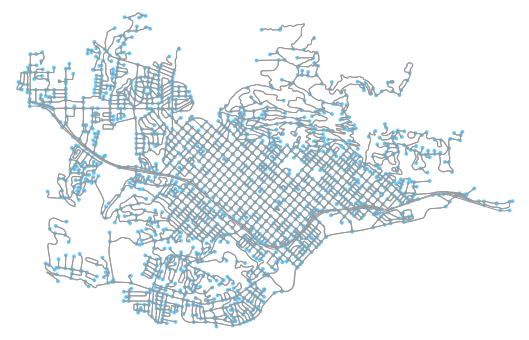

Genova, Italy


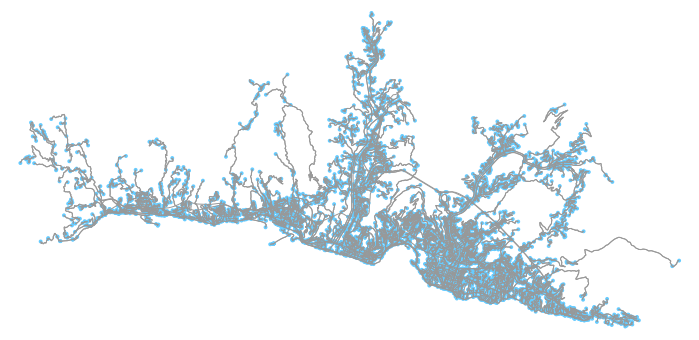

Chicago, IL


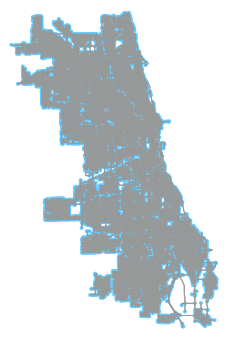

Paris, France


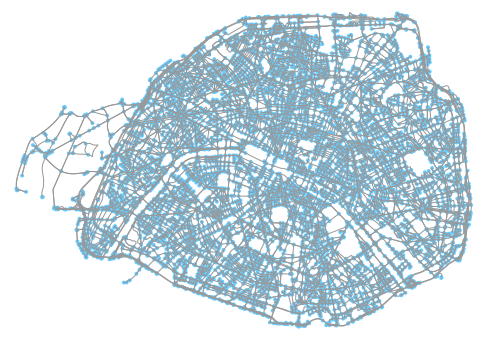

Sydney, Australia


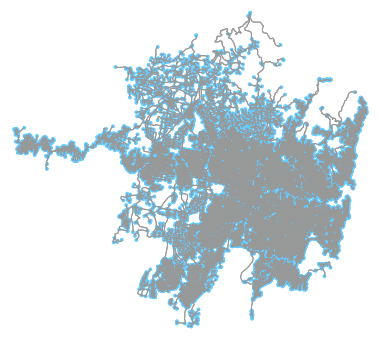

New York, NY


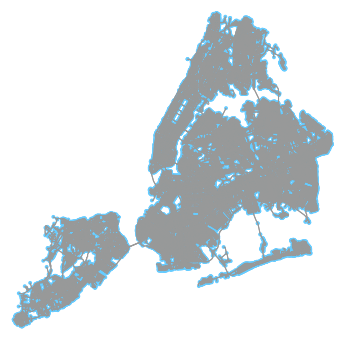

In [50]:
for city in citynets.keys():
    print(city)
    fig,ax = ox.plot_graph(citynets[city][0])
    pl.show()

In [51]:
citifeatures = np.zeros((6,28))
for j,city in enumerate(citynets.keys()):
    tmp=[]
    for v in citynets[city][1].values():
        if (not v is None and (isinstance(v, float) or isinstance(v, int))):
            tmp.append(v) 
        elif not v is None :
            for vv in v.values():
                tmp.append(vv)
    for i in range(len(tmp)):
        citifeatures[j][i] = tmp[i]

citifeatures = np.array(citifeatures)
citifeatures.reshape(6,28)

IndexError: index 28 is out of bounds for axis 0 with size 28

In [ ]:

citiesfeatures = preprocessing.scale(citifeatures)

In [ ]:
for v in manstats.values():
    print (v)

In [ ]:
ax = pl.figure().add_subplot(111)
dist = distance_matrix(citiesfeatures, citiesfeatures, p=2)
cax = ax.imshow(dist)
ax.set_xticks(range(len(citynets.keys())))
ax.set_yticks(range(len(citynets.keys())))
ax.set_xticklabels(citynets.keys(), rotation=75)
ax.set_yticklabels(citynets.keys(), rotation=0)
pl.colorbar(cax);

In [ ]:
print("the most unusual cities")
print(np.array(list(citynets.keys()))[np.argsort(dist.mean(axis=0))[::-1]])

In [ ]:
dist.mean(axis=0)[np.argsort(dist.mean(axis=0))]

In [ ]:
gstats.keys()

In [ ]:
newcitiesfeatures = np.zeros((len(citynets),6)) 
for i,city in enumerate(citynets.keys()):
    for j,k in enumerate(('k_avg','streets_per_node_avg',
        'edge_length_avg','street_length_avg',
        'circuity_avg','self_loop_proportion')):
        newcitiesfeatures[i][j] = citynets[city][1][k]
        

In [ ]:
newcitiesfeatures

In [ ]:
newcitiesfeatures = preprocessing.scale(newcitiesfeatures)

In [ ]:
ax = pl.figure().add_subplot(111)
dist = distance_matrix(newcitiesfeatures, newcitiesfeatures, p=2)
cax = ax.imshow(dist)
ax.set_xticks(range(len(citynets.keys())))
ax.set_yticks(range(len(citynets.keys())))
ax.set_xticklabels(citynets.keys(), rotation=75)
ax.set_yticklabels(citynets.keys(), rotation=0)
pl.colorbar(cax);

In [ ]:
print(np.array(list(citynets.keys()))[np.argsort(dist.mean(axis=0))[::-1]])